# RISTEK Data Science 2021 Open Recruitment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
sns.set(style = "whitegrid")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Sneakpeek

In [4]:
train.shape

(9000, 96)

In [5]:
train.sample(5)

,id,map,patch_version,round_status,round_status_time_left,round_winner,ct_1_armor,ct_1_has_defuser,ct_1_has_helmet,ct_1_health,ct_1_money,ct_1_weapons,ct_1_x,ct_1_y,ct_1_z,ct_2_armor,ct_2_has_defuser,ct_2_has_helmet,ct_2_health,ct_2_money,ct_2_weapons,ct_2_x,ct_2_y,ct_2_z,ct_3_armor,ct_3_has_defuser,ct_3_has_helmet,ct_3_health,ct_3_money,ct_3_weapons,ct_3_x,ct_3_y,ct_3_z,ct_4_armor,ct_4_has_defuser,ct_4_has_helmet,ct_4_health,ct_4_money,ct_4_weapons,ct_4_x,ct_4_y,ct_4_z,ct_5_armor,ct_5_has_defuser,ct_5_has_helmet,ct_5_health,ct_5_money,ct_5_weapons,ct_5_x,ct_5_y,ct_5_z,t_1_armor,t_1_has_defuser,t_1_has_helmet,t_1_health,t_1_money,t_1_weapons,t_1_x,t_1_y,t_1_z,t_2_armor,t_2_has_defuser,t_2_has_helmet,t_2_health,t_2_money,t_2_weapons,t_2_x,t_2_y,t_2_z,t_3_armor,t_3_has_defuser,t_3_has_helmet,t_3_health,t_3_money,t_3_weapons,t_3_x,t_3_y,t_3_z,t_4_armor,t_4_has_defuser,t_4_has_helmet,t_4_health,t_4_money,t_4_weapons,t_4_x,t_4_y,t_4_z,t_5_armor,t_5_has_defuser,t_5_has_helmet,t_5_health,t_5_money,t_5_weapons,t_5_x,t_5_y,t_5_z
8421,8421,de_vertigo,13754,Normal,86.55360,Terrorist,100,False,False,100,50,"M4a4,UspS,Flashbang",-903.69474,779.02031,11775.82745,99.0,False,False,100.0,300.0,"Ak47,UspS",-1031.30923,861.88219,11775.96416,100.0,False,False,100.0,0.0,"M4a4,UspS,SmokeGrenade,Flashbang",-944.99468,858.41847,11775.80589,100.0,False,False,100.0,100.0,"M4a4,UspS,SmokeGrenade,IncendiaryGrenade",-1085.84515,813.95978,11776.08009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,False,True,100.0,6350.0,"Ak47,Glock,SmokeGrenade,Flashbang,MolotovGrenade",-1296.69326,-1392.39292,11488.08509,100.0,False,True,100.0,3450.0,"Awp,P250,MolotovGrenade,Flashbang",-1467.35370,-1428.70406,11487.90479,100.0,False,True,100.0,1350.0,"Glock,Ak47,SmokeGrenade,HeGrenade,Flashbang,C4",-1332.19917,-1453.21530,11488.20215,100.0,False,True,100.0,5350.0,"Mac10,Deagle,SmokeGrenade,MolotovGrenade",-1405.92900,-1455.27302,11488.15708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702,1702,de_dust2,13740,Normal,54.77293,CT,100,False,True,100,0,"Famas,UspS,SmokeGrenade,Flashbang",351.19131,2352.88835,-120.39495,100.0,False,True,100.0,100.0,"UspS,Ump45,SmokeGrenade",182.17687,2438.95030,-120.92142,100.0,False,True,100.0,450.0,"Famas,UspS",160.15851,2369.58998,-119.89467,100.0,True,True,100.0,0.0,"Famas,UspS,IncendiaryGrenade",334.38089,2433.88694,-120.39084,100.0,True,True,100.0,400.0,"Mp9,UspS,Flashbang",258.23402,2480.40621,-120.90570,0.0,False,False,100.0,50.0,"Glock,Ssg08",-657.07793,-755.86813,119.87479,0.0,False,False,100.0,0.0,"Glock,Ssg08",-1076.22018,-843.09676,117.01820,92.0,False,True,81.0,50.0,Deagle,-760.72755,-836.12765,117.09509,100.0,False,True,100.0,0.0,"P250,SmokeGrenade,Flashbang,HeGrenade,C4",-980.10089,-753.87055,120.26998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,de_mirage,13733,Normal,104.93822,Terrorist,100,True,False,100,2600,"Awp,UspS,Flashbang,SmokeGrenade,IncendiaryGrenade",-1776.07059,-1799.92647,-263.97983,100.0,True,False,100.0,5050.0,"Sg553,UspS,IncendiaryGrenade,SmokeGrenade,Flas...",-1976.02161,-1812.07884,-287.89114,100.0,True,True,100.0,850.0,"M4a4,UspS,IncendiaryGrenade",-1655.88083,-1976.03693,-268.78429,100.0,True,True,100.0,1650.0,"M4a4,UspS,IncendiaryGrenade,SmokeGrenade,HeGre...",-1552.13969,-1807.93930,-266.26536,100.0,True,True,100.0,2800.0,"UspS,Awp,SmokeGrenade,Flashbang,HeGrenade",-1655.81254,-1799.99561,-267.06363,100.0,False,True,100.0,150.0,"Deagle,Flashbang,SmokeGrenade,MolotovGrenade",1296.04179,-159.97079,-168.00940,100.0,False,True,100.0,550.0,"Sg553,Glock,MolotovGrenade,Flashbang,HeGrenade",1215.99010,-210.97310,-163.88068,100.0,False,True,100.0,650.0,"Ak47,Glock,SmokeGrenade,Flashbang",1136.19513,-63.97726,-168.11811,100.0,False,True,100.0,1150.0,"Sg553,Glock,MolotovGrenade,Flashbang",1376.01045,-304.12733,-167.94578,100.0,False,True,100.0,100.0,"Ak47,Glock,SmokeGrenade,MolotovGrenade",1375.92877,-208.03795,-164.11848
4565,4565,de_mirage,13754,Normal,75.01327,Terrorist,100,True,True,97,7450,"Deagle,Awp",-1975.68453,-1811.966

# Univariate Analysis 

## Round Winners 

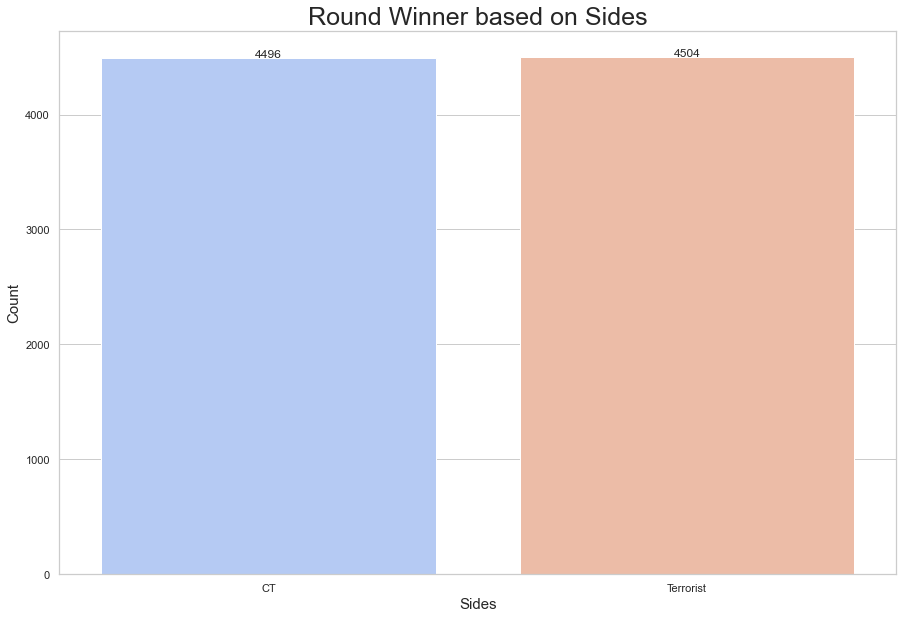

In [8]:
plt.figure(figsize=(15, 10))
ax1 = sns.countplot("round_winner", data = dftrain, palette = "coolwarm")
plt.title("Round Winner based on Sides", fontsize = 25)
plt.xlabel("Sides", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax1.patches:
    height = x.get_height()
    ax1.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

#### D.1.1 Round Winner based on Maps

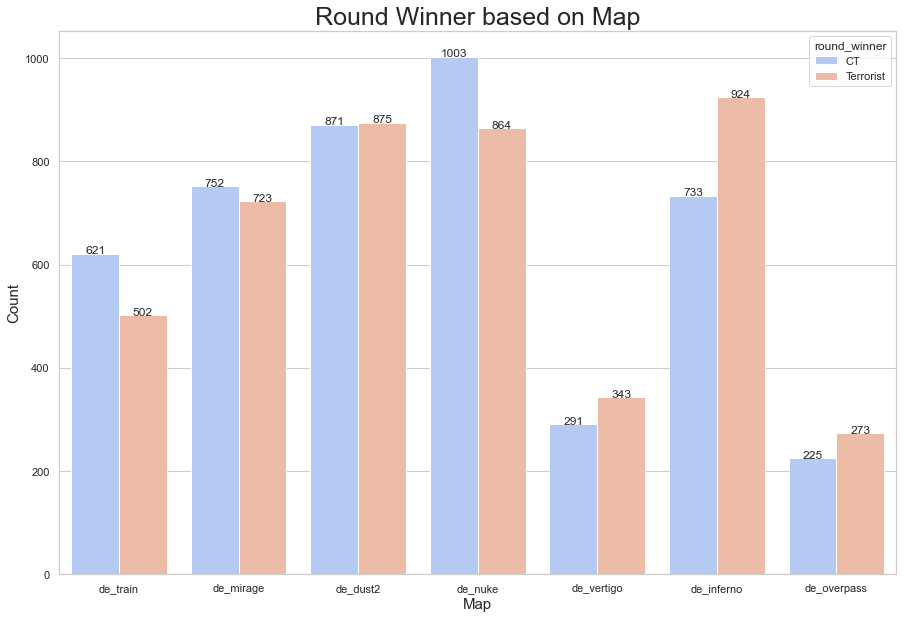

In [9]:
plt.figure(figsize=(15, 10))
ax2 = sns.countplot("map", hue = "round_winner", data = dftrain, palette = "coolwarm")
plt.title("Round Winner based on Map", fontsize = 25)
plt.xlabel("Map", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax2.patches:
    height = x.get_height()
    ax2.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

- Berdasarkan plotting diatas, Counter-Terrorist lebih sering memenangkan pertandingan di map Train, Mirage, dan Nuke. 
- Sedangkan, Terrorist lebih banyak memenangkan pertandingan di map Dust-2, Vertigo, Inferno, dan Overpass.
- Perbedaan jumlah kemenangan di map Dust-2 antara Terrorist dan Counter-Terrorist tidak signifikan karena hanya selisih 4 kemenangan antara Terrorist dengan Counter-Terrorist

#### D.1.2 Round Winner based on Round Status 

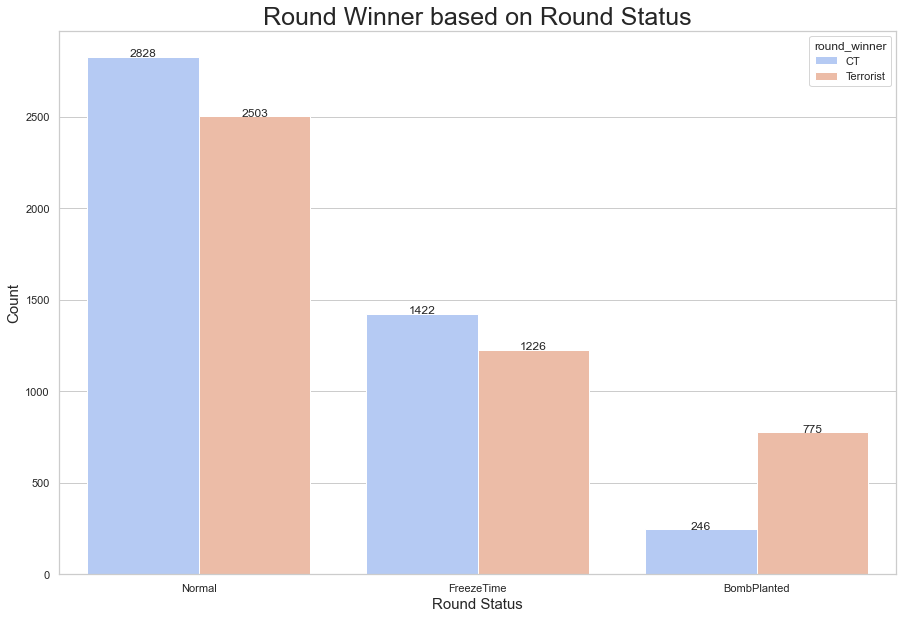

In [10]:
plt.figure(figsize=(15, 10))
ax3 = sns.countplot("round_status", hue = "round_winner", data = dftrain, palette = "coolwarm")
plt.title("Round Winner based on Round Status", fontsize = 25)
plt.xlabel("Round Status", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax3.patches:
    height = x.get_height()
    ax3.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")

plt.show()

- Presentase kemenangan Terrorist yang lebih tinggi dibanding Counter-Terrorist terlihat saat round status Bomb Planted atau ketika bomb telah di plant. Dari countplot tersebut menujukkan Counter-Terrorist hanya berhasil mendefuse bomb sebanyak 246 kali sedangkan 775 kali gagal.
- Berdasarkan nama map yang didapatkan yaitu diawal dengan de_ berarti seluruh mode permainan merupakan mode demolition atau menggunakan bom sehingga dapat dilihat bahwa Terrorist menang menggunakan bomb hanya 775 kali atau 8.6% dan presentase Counter-Terrorist bisa mendefuse bomb hanya 246 kali atau 2.7%

#### D.1.3 Round Winner based on Time Left (s)

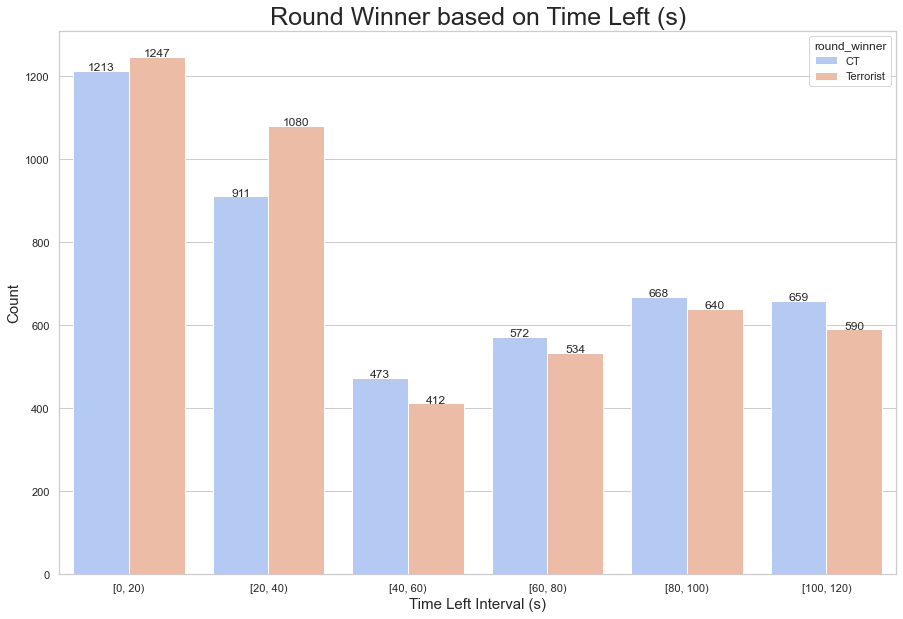

In [11]:
plt.figure(figsize=(15, 10))
ax4 = sns.countplot(pd.cut(dftrain["round_status_time_left"], bins = np.arange(0, 121, 20), right = False), hue = "round_winner", data = dftrain, palette = "coolwarm")
plt.title("Round Winner based on Time Left (s)", fontsize = 25)
plt.xlabel("Time Left Interval (s)", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax4.patches:
    height = x.get_height()
    ax4.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

- Kebanyakan permainan dimenangkan pada saat interval waktu tersisa kurang dari 20 detik, namun tidak terdapat perbedaa kemenangan yang signifikan dalam hal interval waktu tersisa.

### D.2 Most Used Weapons

In [12]:
weaponList = []

In [13]:
weaponListCT = []
def count(x):
    if (type(x) == float): pass
    else:
        wList = x.split(",")
        for w in wList:
            weaponListCT.append(w)
            weaponList.append(w)
            
for y, i in enumerate(["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]):
    dftrain.apply(lambda x: count(x[i]), axis = 1)
               
countedListCT = {}
for weapon in weaponListCT:
    countedListCT[weapon] = countedListCT.get(weapon, 0) + 1

In [17]:
weaponListT = []
def count(x):
    if (type(x) == float): pass
    else:
        wList = x.split(",")
        for w in wList:
            weaponListT.append(w)
            weaponList.append(w)
            
for y, i in enumerate(["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]):
    dftrain.apply(lambda x: count(x[i]), axis = 1)
               
countedListT = {}
for weapon in weaponListT:
    countedListT[weapon] = countedListT.get(weapon, 0) + 1
    
countedListT.items()

dict_items([('Ak47', 13837), ('Tec9', 553), ('Flashbang', 17052), ('MolotovGrenade', 12018), ('Sg553', 4155), ('Glock', 30084), ('P250', 2515), ('SmokeGrenade', 15601), ('C4', 6558), ('Deagle', 3476), ('HeGrenade', 4158), ('Awp', 2816), ('GalilAr', 1101), ('UspS', 1125), ('Mac10', 811), ('M4a4', 507), ('Cz75Auto', 707), ('IncendiaryGrenade', 209), ('Aug', 103), ('DecoyGrenade', 429), ('Ssg08', 202), ('Ump45', 265), ('Mp9', 51), ('FiveSeven', 57), ('P2000', 43), ('Famas', 69), ('M4a1S', 46), ('Elite', 28), ('ZeusX27', 26), ('Mp7', 13), ('Mp5sd', 25), ('Mag7', 1), ('Xm1014', 3), ('P90', 1), ('G3sg1', 3)])

#### D.2.1 Most Used Weapons by Counter-Terrorist 

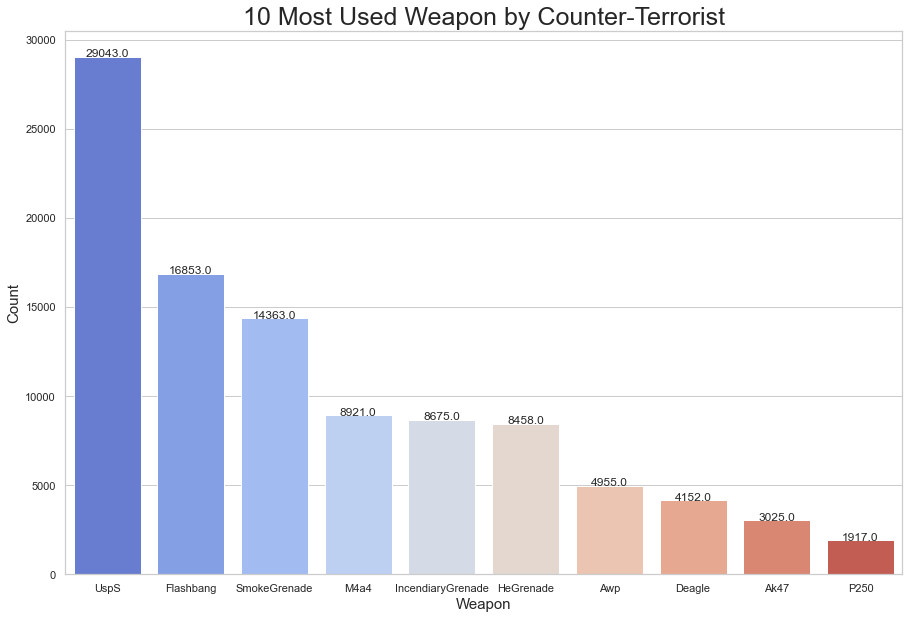

In [15]:
dfWCT = pd.DataFrame(countedListCT.items(), columns=["Weapon", "Count"]).sort_values("Count", ascending = False)[0:10]

plt.figure(figsize = (15, 10))
ax10 = sns.barplot(x = "Weapon", y = "Count", data = dfWCT, palette = "coolwarm")
plt.title("10 Most Used Weapon by Counter-Terrorist", fontsize = 25)
plt.xlabel("Weapon", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax10.patches:
    height = x.get_height()
    ax10.text(x.get_x()+x.get_width()/2., height + 1, height, ha = "center")
    
plt.show()

- Counter-Terrorist mendapatkan UspS sebagai senjata default pada saat awal permainan dan bisa diganti menjadi P250, dari grafik diatas terlihat bahwa hanya sedikit pemain yang mengganti default senjatanya dari UspS menjadi P250
- M4a4 merupakan senjata rifle default yang dapat digunakan oleh Counter-Terrorist

#### D.2.2 Most Used Weapons by Terrorist

In [ ]:
dfWT = pd.DataFrame(countedListT.items(), columns=["Weapon", "Count"]).sort_values("Count", ascending = False)[0:10]

plt.figure(figsize=(15, 10))
ax11 = sns.barplot(x = "Weapon", y = "Count", data = dfWT, palette = "coolwarm")
plt.title("10 Most Used Weapon by Terrorist", fontsize = 25)
plt.xlabel("Weapon", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax11.patches:
    height = x.get_height()
    ax11.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

- Terrorist mendapatkan glock sebagia senjata defaultnya menjelaskan mengapa grafik tertinggi senjata yang digunakan adalah glock.
- Ak47 merupakan senjata rifle default yang dapat digunakan oleh Terrorist

#### D.2.3 Most Used Weapons by Both Sides

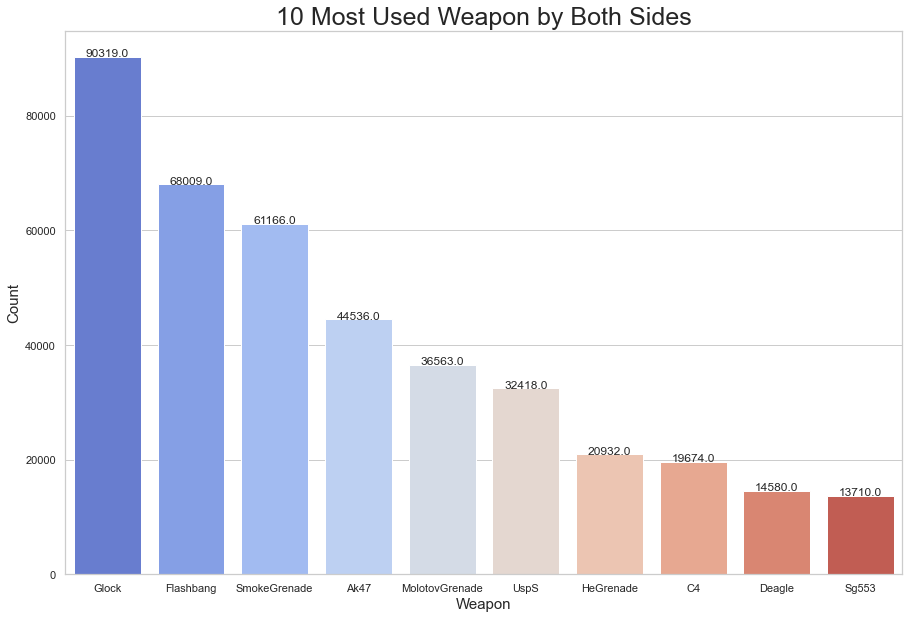

In [18]:
countedList = {}
for weapon in weaponList:
    countedList[weapon] = countedList.get(weapon, 0) + 1
    
dfW = pd.DataFrame(countedList.items(), columns=["Weapon", "Count"]).sort_values("Count", ascending = False)[0:10]

plt.figure(figsize=(15, 10))
ax12 = sns.barplot(x = "Weapon", y = "Count", data = dfW, palette = "coolwarm")
plt.title("10 Most Used Weapon by Both Sides", fontsize = 25)
plt.xlabel("Weapon", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax12.patches:
    height = x.get_height()
    ax12.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

### D.3 Players per Game

In [19]:
countTeam = dftrain[["id", "round_winner"]]

def changeInt(x):
    if (x == False): return 1
    else: return 0

for x, i in enumerate([6, 15, 24, 33, 42, 51, 60, 69, 78, 87]):
    temp = dftrain.iloc[:, i:i+9]
    cols = temp.columns
    countTeam[f"player_{x+1}"] = temp[cols].isnull().apply(lambda x: all(x), axis=1)
    countTeam[f"player_{x+1}"] = countTeam[f"player_{x+1}"].apply(changeInt)

countTeam["CT_Player"] = countTeam["player_1"] + countTeam["player_2"] + countTeam["player_3"] + countTeam["player_4"] + countTeam["player_5"]
countTeam["T_Player"] = countTeam["player_6"] + countTeam["player_7"] + countTeam["player_8"] + countTeam["player_9"] + countTeam["player_10"]

In [20]:
countTeam["CT_Player"] = countTeam["CT_Player"].astype(str)
countTeam["T_Player"] = countTeam["T_Player"].astype(str)
countTeam["CT vs T"] = countTeam["CT_Player"] + " v " + countTeam["T_Player"]

#### D.3.1 PPG: Counter-Terrorist vs Round Winner

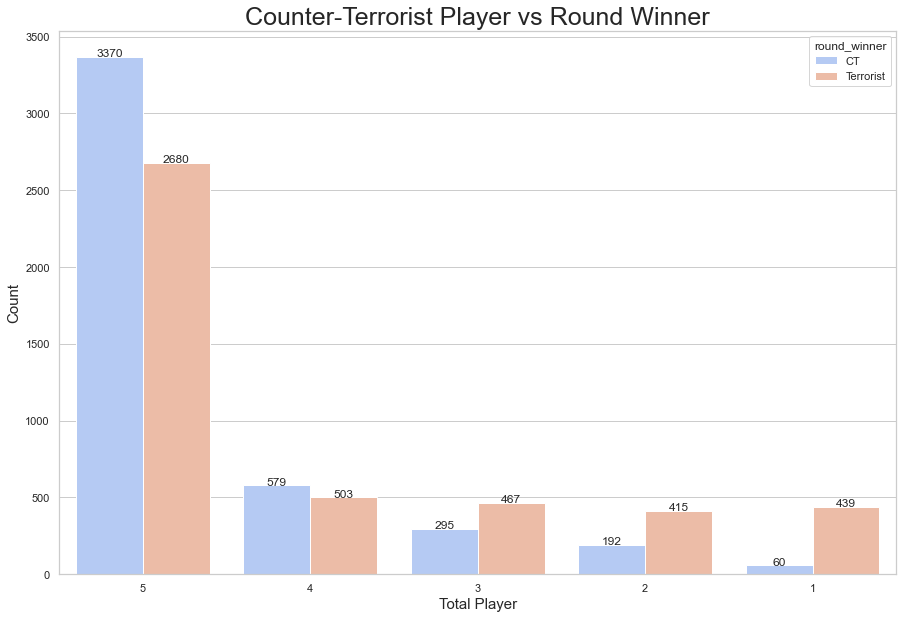

In [21]:
plt.figure(figsize=(15, 10))
ax21 = sns.countplot("CT_Player", hue = "round_winner", data = countTeam, palette = "coolwarm",
                    order = ["5", "4", "3", "2", "1"])
plt.title("Counter-Terrorist Player vs Round Winner", fontsize = 25)
plt.xlabel("Total Player", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax21.patches:
    height = x.get_height()
    ax21.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

#### D.3.2 PPG: Terrorist vs Round Winner 

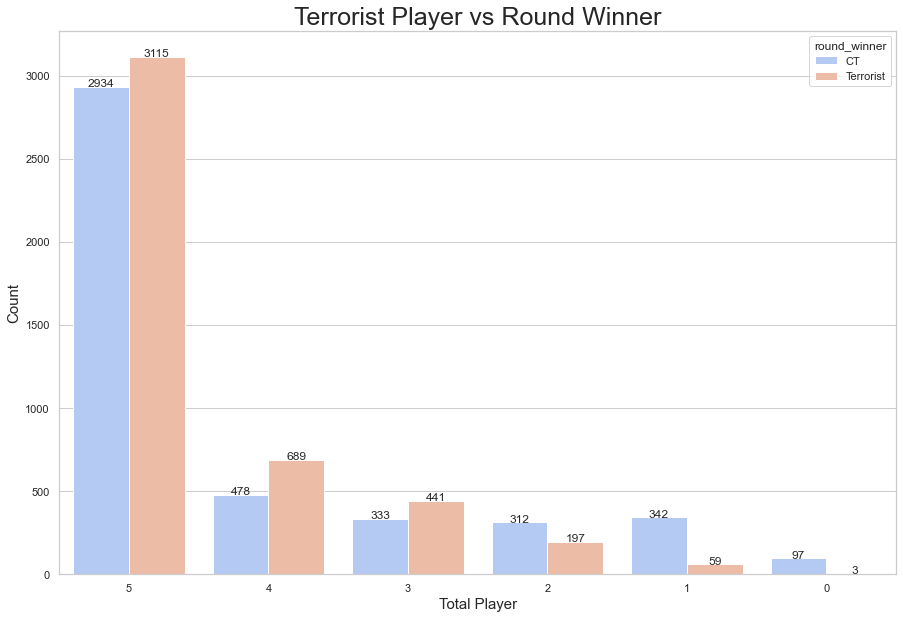

In [22]:
plt.figure(figsize=(15, 10))
ax22 = sns.countplot("T_Player", hue = "round_winner", data = countTeam, palette = "coolwarm",
                    order = ["5", "4", "3", "2", "1", "0"])
plt.title("Terrorist Player vs Round Winner", fontsize = 25)
plt.xlabel("Total Player", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

for x in ax22.patches:
    height = x.get_height()
    ax22.text(x.get_x()+x.get_width()/2., height + 0.1, height, ha = "center")
    
plt.show()

- Disini terlihat outliers ketika pemain Terrorist berjumlah 0 atau dari seluruh 9 kolom terdapat kemenangan sebanyak 3 kali.

#### D.3.3 PPG: Counter-Terrorist vs Terrorist

Akan dilihat secara lebih detail disini kategori-kategori permainan berdasarkan jumlah pemain yang bermain apakah match imbang secara jumlah pemain atau tidak.

In [23]:
totalPlayerCount = countTeam["CT vs T"].unique().tolist()
totalPlayerCount = sorted(totalPlayerCount, reverse = True)

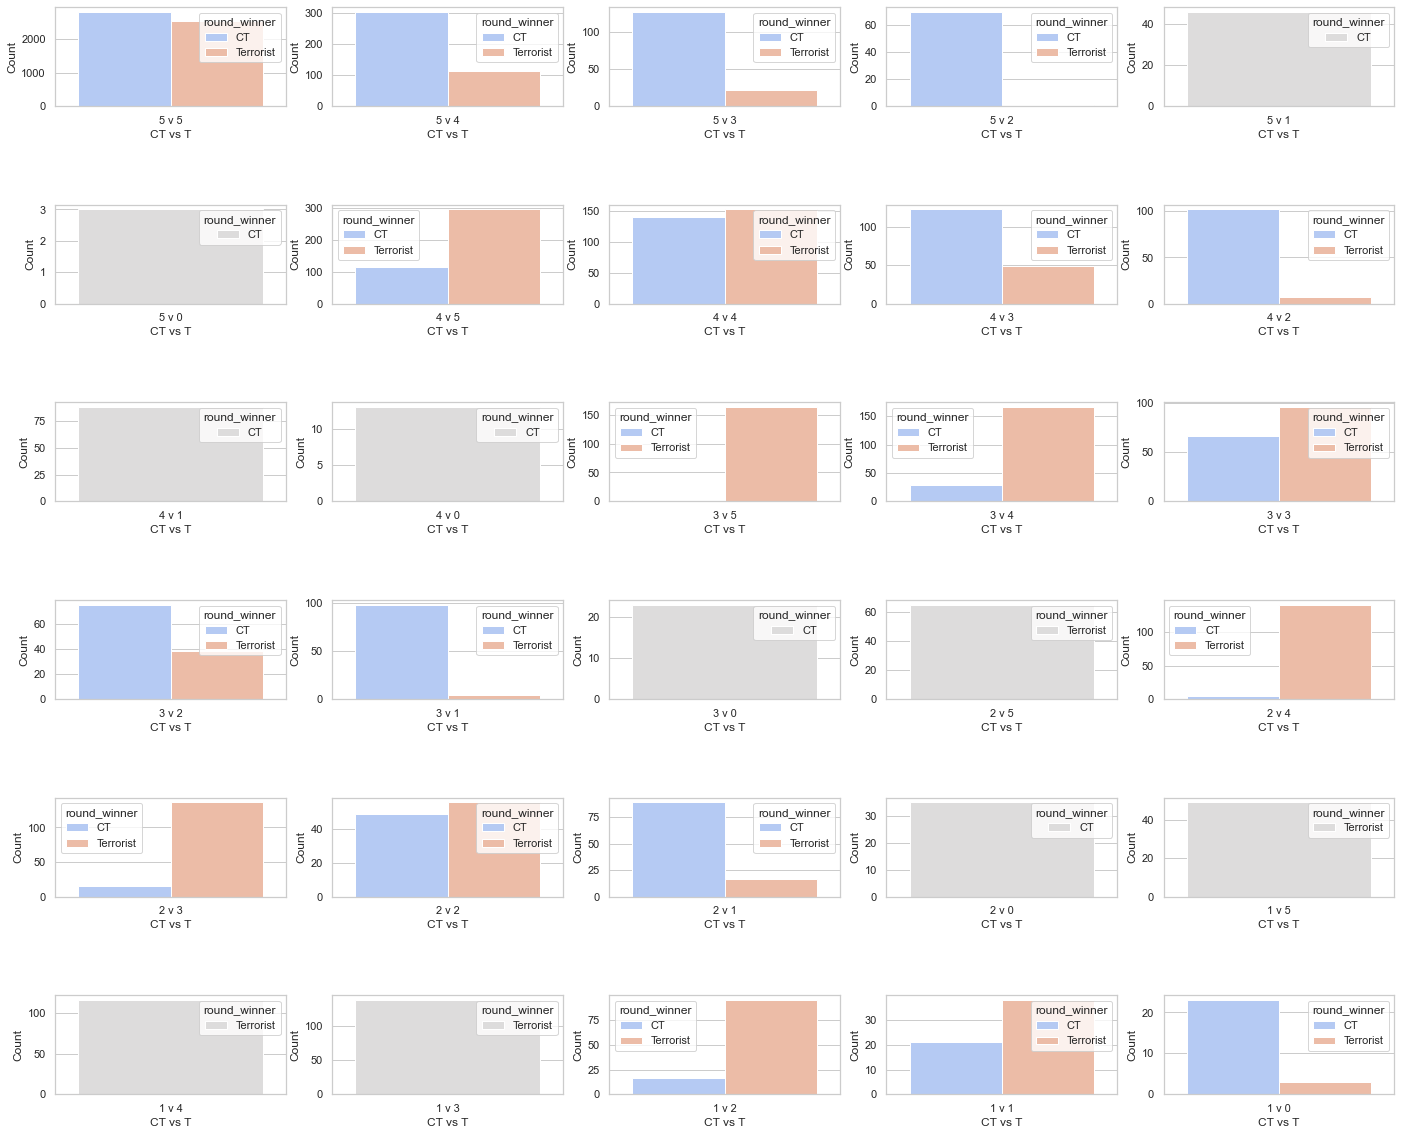

In [24]:
fig, axes = plt.subplots(6, 5, figsize=(24, 20), sharex=False)
fig.subplots_adjust(hspace=1)
for name, ax in zip(totalPlayerCount, axes.flatten()):
    temp = countTeam.loc[countTeam["CT vs T"] == name]
    sns.countplot("CT vs T", hue = "round_winner", data=temp, ax=ax, palette = "coolwarm")
    ax.set_ylabel('Count')

Untuk setiap rows yang memiliki kolom NaN perbandingan sides yang menang dapat dilihat dari data diatas.
- Untuk sides yang memiliki lebih sedikit pemain hampir seluruh pertandingannya dimenangkan oleh sides yang jumlah pemainnya lebih banyak.
- Secara default permainan CSGO harus dimainkan oleh 5 pemain, namun di beberapa permainan suatu pemain dapat digantikan oleh bot jika left.
- Perhitungan player tersebut dihitung berdasarkan jumlah value NaN dalam satu blok informasi satu pemain (contoh: Armor sampai Z Axis dari pemain) jika 9 kolom itu berisikan nilai NaN atau null values maka akan dianggap tidak ada pemain.
- Outliers Terrorist berjumlah 0 pemain terlihat ketika match berisi 1 Counter-Terrorist dan 0 Terrorist.
- NaN values disini akan dianggap sebagai bot sehingga dari tabel diatas dianggap bahwa missing values tersebut merupakan kategori MCAR karena bermain atau tidaknya pemain dan digantikan oleh bot merupakan suatu hal yang completely random dan tidak terikat dengan variabel lain.

#### D.3.4 Applying Player Count to Original DataFrame

In [25]:
dftrain["CT Player"] = countTeam["CT_Player"].astype(int)
dftrain["T Player"] = countTeam["T_Player"].astype(int)

### D.4 Money

#### D.4.1 Counter-Terrorist Money Distribution

<Figure size 1080x720 with 0 Axes>

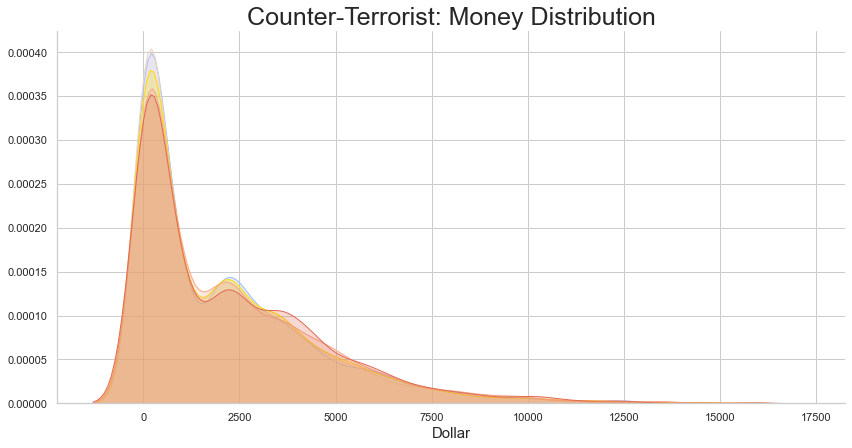

In [26]:
ax31 = sns.FacetGrid(dftrain, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax31.map(sns.kdeplot,'ct_1_money', color = "#9abbff", shade = True)
ax31.map(sns.kdeplot,'ct_2_money', color = "#edd1c2", shade = True)
ax31.map(sns.kdeplot,'ct_3_money', color = "#ffdb00", shade = True)
ax31.map(sns.kdeplot,'ct_4_money', color = "#f7a889", shade = True)
ax31.map(sns.kdeplot,'ct_5_money', color = "#e26952", shade = True)

plt.title("Counter-Terrorist: Money Distribution", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

#### D.4.2 Terrorist Money Distribution

<Figure size 1080x720 with 0 Axes>

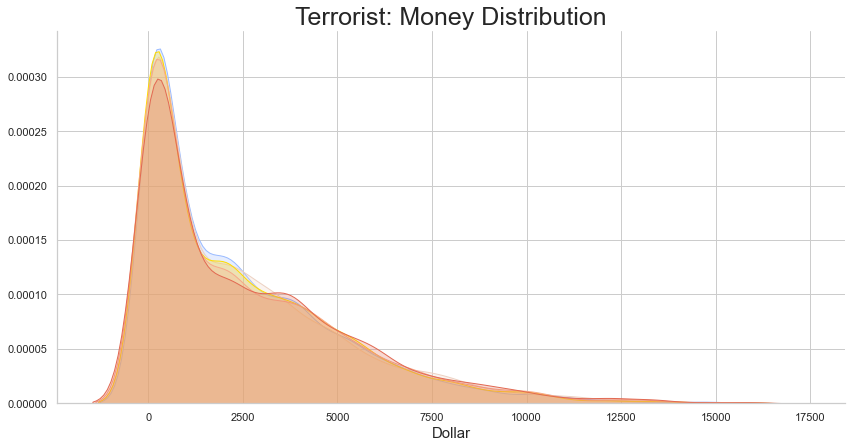

In [27]:
ax32 = sns.FacetGrid(dftrain, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax32.map(sns.kdeplot,'t_1_money', color = "#9abbff", shade = True)
ax32.map(sns.kdeplot,'t_2_money', color = "#edd1c2", shade = True)
ax32.map(sns.kdeplot,'t_3_money', color = "#ffdb00", shade = True)
ax32.map(sns.kdeplot,'t_4_money', color = "#f7a889", shade = True)
ax32.map(sns.kdeplot,'t_5_money', color = "#e26952", shade = True)

plt.title("Terrorist: Money Distribution", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

### D.5 Correlation

#### D.5.1 Weapons

Senjata yang dimiliki setiap pemain akan dihitung berapa senjata yang dimiliki atau dipakai pemain pada saat permainan

In [28]:
for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftrain[y].fillna("No Weapon", inplace = True)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftrain[y].fillna("No Weapon", inplace = True)

def totalW(x):
    if x == "No Weapon":
        return 0
    else:
        return len(x.split(","))

In [29]:
for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftrain[y] = dftrain.apply(lambda x: totalW(x[y]), axis = 1)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftrain[y] = dftrain.apply(lambda x: totalW(x[y]), axis = 1)

#### D.5.2 Correlation

In [30]:
label = ["id", "patch_version"]

dfCorr = dftrain.drop(label, axis = 1)

def colorised(x):
    if (-0.3 <= x < 0) or (0 < x <= 0.3): color = "black"
    elif (-0.6 <= x < -0.3) or (0.3 < x <= 0.6): color = "blue"
    elif (-0.9 <= x < -0.6) or (0.6 < x <= 0.9): color = "green"
    else: color = "purple"
        
    return 'color: %s' % color

In [31]:
dfCorrDum = pd.get_dummies(dfCorr, columns = ["map", "round_status"])

In [32]:
correlated = dfCorrDum.corr(method = "pearson")
correlated = correlated.style.applymap(colorised)
correlated

- Korelasi jumlah uang (money) antar pemain di sides yang sama memiliki korelasi positif yang tinggi.
- Korelasi antara axis atau lokasi x, y, ataupun z antar pemain di sides yang sama memiliki korelasi positif yang tinggi.
- Korelasi antara axis x antar pemain di beda sides memiliki korelasi negatif yang cukup tinggi.
- Korelasi jumlah senjata yang dimiliki antar pemain di sides yang sama memiliki korelasi positif yang cukup tinggi.

#### D.5.3 Money Correlation: Counter Terrorist

<Figure size 1080x720 with 0 Axes>

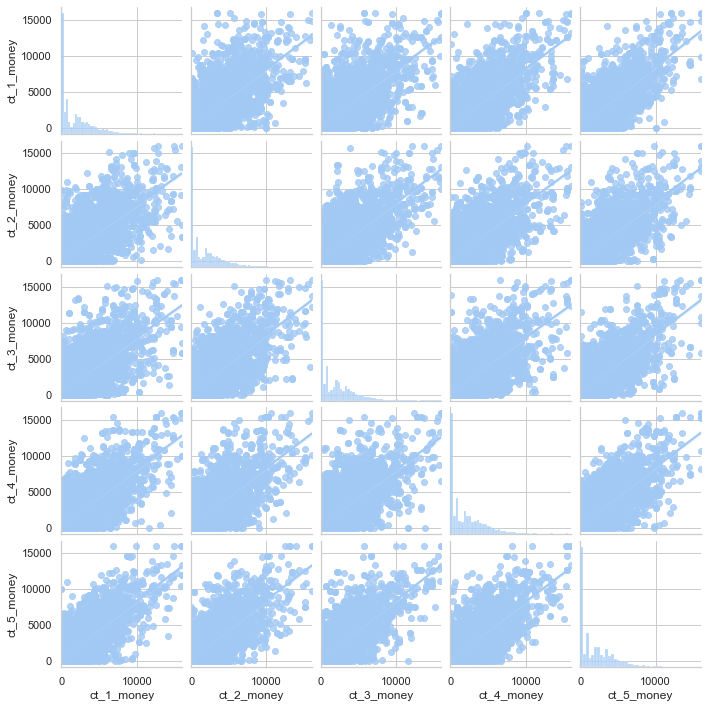

In [33]:
plt.figure(figsize=(15, 10))
sns.set_palette("pastel")
ax41 = sns.pairplot(dftrain,height = 2, vars = ["ct_1_money", "ct_2_money", "ct_3_money", "ct_4_money", "ct_5_money"],  
             kind = "reg")
plt.show()

#### D.5.3 Money Correlation: Terrorist

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("pastel")
ax42 = sns.pairplot(dftrain,height = 2, vars = ["t_1_money", "t_2_money", "t_3_money", "t_4_money", "t_5_money"],  
             kind = "reg")
plt.show()

#### D.5.4 X-Axis Location: Counter-Terrorist

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("pastel")
ax43 = sns.pairplot(dftrain,height = 2, vars = ["ct_1_x", "ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"],  
             kind = "reg")
plt.show()

#### D.5.5 X-Axis Location: Terrorist

In [ ]:
plt.figure(figsize=(15, 10))
sns.set_palette("pastel")
ax44 = sns.pairplot(dftrain,height = 2, vars = ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"],  
             kind = "reg")
plt.show()

- Berdasarkan lokasi dari Counter-Terrorist terdapat 7 titik berbeda yang memiliki korelasi antar pemain. Tujuh titik tersebut mungkin dapat diartikan sebagai 7 map berbeda yang terdapat di dataset ini
- Scatterplot bagian Terrorist juga menunjukkan beberapa titik yang berbeda namun terdapat satu titik besar yang berada di antara berada di bawah 0 sampai sekitar -1200

#### Configure dfTrain

In [ ]:
dftrain["CT Player"] = countTeam["CT_Player"].astype(int)
dftrain["T Player"] = countTeam["T_Player"].astype(int)

dftrainunedit = dftrain

## E. Data Modelling and Evaluation

### E.1 Dropping Columns

In [ ]:
dftrainx = pd.read_csv("train.csv")
dftestx = pd.read_csv("test.csv")

- Dibawah ini akan ditambahkan terlebih dahulu jumlah setiap pemain dalam setiap row seperti yang dilakukan sebelumnya.

In [ ]:
countTeamTrain = dftrainx["round_winner"]

def changeInt(x):
    if (x == False): return 1
    else: return 0

for x, i in enumerate([6, 15, 24, 33, 42, 51, 60, 69, 78, 87]):
    temp = dftrainx.iloc[:, i:i+9]
    cols = temp.columns
    countTeamTrain[f"player_{x+1}"] = temp[cols].isnull().apply(lambda x: all(x), axis=1)
    countTeamTrain[f"player_{x+1}"] = countTeamTrain[f"player_{x+1}"].apply(changeInt)

countTeamTrain["CT_Player"] = countTeamTrain["player_1"] + countTeamTrain["player_2"] + countTeamTrain["player_3"] + countTeamTrain["player_4"] + countTeamTrain["player_5"]
countTeamTrain["T_Player"] = countTeamTrain["player_6"] + countTeamTrain["player_7"] + countTeamTrain["player_8"] + countTeamTrain["player_9"] + countTeamTrain["player_10"]

dftrainx["CT Player"] = countTeamTrain["CT_Player"].astype(int)
dftrainx["T Player"] = countTeamTrain["T_Player"].astype(int)

In [ ]:
countTeamTest = dftestx["id"]

def changeInt(x):
    if (x == False): return 1
    else: return 0

for x, i in enumerate([5, 14, 23, 32, 41, 50, 59, 68, 77, 86]):
    temp = dftestx.iloc[:, i:i+9]
    cols = temp.columns
    countTeamTest[f"player_{x+1}"] = temp[cols].isnull().apply(lambda x: all(x), axis=1)
    countTeamTest[f"player_{x+1}"] = countTeamTest[f"player_{x+1}"].apply(changeInt)

countTeamTest["CT_Player"] = countTeamTest["player_1"] + countTeamTest["player_2"] + countTeamTest["player_3"] + countTeamTest["player_4"] + countTeamTest["player_5"]
countTeamTest["T_Player"] = countTeamTest["player_6"] + countTeamTest["player_7"] + countTeamTest["player_8"] + countTeamTest["player_9"] + countTeamTest["player_10"]

dftestx["CT Player"] = countTeamTest["CT_Player"].astype(int)
dftestx["T Player"] = countTeamTest["T_Player"].astype(int)

- Health, Patch Version, dan ID akan di drop dari dataset karena di tabel correlation tidak menujukkan korelasi yang signifikan terhadap variabel lain

In [ ]:
toDrop = ["ct_1_health", "ct_2_health", "ct_3_health", "ct_4_health", "ct_5_health",
        "t_1_health", "t_2_health", "t_3_health", "t_4_health", "t_5_health",
          "patch_version", "id"]

dftraintest = dftrainx.drop(toDrop, axis = 1)
dftesttest = dftestx.drop(toDrop, axis = 1)

#### E.1.2 Mengubah Weapon di Test dan Train

In [ ]:
for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftraintest[y].fillna("No Weapon", inplace = True)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftraintest[y].fillna("No Weapon", inplace = True)

for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftesttest[y].fillna("No Weapon", inplace = True)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftesttest[y].fillna("No Weapon", inplace = True)

def totalW(x):
    if x == "No Weapon":
        return 0 # Jika bot akan dianggap memakai default senjata yaitu UspS ataupun Glock.
    else:
        return len(x.split(","))

In [ ]:
for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftesttest[y] = dftesttest.apply(lambda x: totalW(x[y]), axis = 1)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftesttest[y] = dftesttest.apply(lambda x: totalW(x[y]), axis = 1)

In [ ]:
for y in ["ct_1_weapons", "ct_2_weapons", "ct_3_weapons", "ct_4_weapons", "ct_5_weapons"]:
    dftraintest[y] = dftraintest.apply(lambda x: totalW(x[y]), axis = 1)
    
for y in ["t_1_weapons", "t_2_weapons", "t_3_weapons", "t_4_weapons", "t_5_weapons"]:
    dftraintest[y] = dftraintest.apply(lambda x: totalW(x[y]), axis = 1)

### E.2 Missing Values

#### E.2.1 Money

- Karena NaN akan dianggap sebagai bot, dan bot mendapatkan hak atau value yang sama terhadap jumlah uang (money) yang didapatkan dalam suatu pertandingan maka pengisian NaN value akan menggukan fill by interpolate

In [ ]:
moneymiss = ["ct_1_money", "ct_2_money", "ct_3_money", "ct_4_money", "ct_5_money",
            "t_1_money", "t_2_money", "t_3_money", "t_4_money", "t_5_money"]

In [ ]:
for x in moneymiss:
    dftraintest[x] = dftraintest[x].interpolate()
    
for x in moneymiss:
    dftesttest[x] = dftesttest[x].interpolate()

- E.2.1.1 Counter Terrorist Money Distribution - Before

In [ ]:
ax51 = sns.FacetGrid(dftrain, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax51.map(sns.kdeplot,'ct_1_money', color = "#9abbff", shade = True)
ax51.map(sns.kdeplot,'ct_2_money', color = "#edd1c2", shade = True)
ax51.map(sns.kdeplot,'ct_3_money', color = "#ffdb00", shade = True)
ax51.map(sns.kdeplot,'ct_4_money', color = "#f7a889", shade = True)
ax51.map(sns.kdeplot,'ct_5_money', color = "#e26952", shade = True)

plt.title("Counter-Terrorist: Money Distribution - Before Interpolation", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

- E.2.1.2 Counter Terrorist Money Distribution - After

In [ ]:
ax52 = sns.FacetGrid(dftraintest, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax52.map(sns.kdeplot,'ct_1_money', color = "#9abbff", shade = True)
ax52.map(sns.kdeplot,'ct_2_money', color = "#edd1c2", shade = True)
ax52.map(sns.kdeplot,'ct_3_money', color = "#ffdb00", shade = True)
ax52.map(sns.kdeplot,'ct_4_money', color = "#f7a889", shade = True)
ax52.map(sns.kdeplot,'ct_5_money', color = "#e26952", shade = True)

plt.title("Counter-Terrorist: Money Distribution - After Interpolation", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

- E.2.1.3 Terrorist Money Distribution - Before

In [ ]:
ax53 = sns.FacetGrid(dftrain, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax53.map(sns.kdeplot,'t_1_money', color = "#9abbff", shade = True)
ax53.map(sns.kdeplot,'t_2_money', color = "#edd1c2", shade = True)
ax53.map(sns.kdeplot,'t_3_money', color = "#ffdb00", shade = True)
ax53.map(sns.kdeplot,'t_4_money', color = "#f7a889", shade = True)
ax53.map(sns.kdeplot,'t_5_money', color = "#e26952", shade = True)

plt.title("Terrorist: Money Distribution - Before Interpolation", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

- E.2.1.4 Money Distribution Terrorist - After

In [ ]:
ax53 = sns.FacetGrid(dftraintest, palette = "coolwarm", size = 6, aspect = 2)

plt.figure(figsize=(15, 10))
ax53.map(sns.kdeplot,'t_1_money', color = "#9abbff", shade = True)
ax53.map(sns.kdeplot,'t_2_money', color = "#edd1c2", shade = True)
ax53.map(sns.kdeplot,'t_3_money', color = "#ffdb00", shade = True)
ax53.map(sns.kdeplot,'t_4_money', color = "#f7a889", shade = True)
ax53.map(sns.kdeplot,'t_5_money', color = "#e26952", shade = True)

plt.title("Terrorist: Money Distribution - After Interpolation", fontsize = 25)
plt.xlabel("Dollar", fontsize = 15)
plt.show()

#### E.2.2 Axis Position

- Dapat dilihat dari tabel dibawah ini bahwa titik yang tadi terlihat atau tersebar di scatterplot dibagian correlation tergambar dengan jelas karena di setiap map X-Axis, Y-Axis, dan Z-Axis memiliki persebarannya masing-masing.
- Filling missing values dari data X, Y, dan Z axis akan menggunakan median dari data axis yang berbeda dari setiap map.

In [ ]:
trainmap = dftraintest.groupby("map")
trainmap.median()

In [ ]:
testmap = dftesttest.groupby("map")
testmap.median()

#### E.2.3 X-Axis Position

In [ ]:
xaxismiss = ["ct_2_x", "ct_3_x", "ct_4_x", "ct_5_x"]
for axis in xaxismiss:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(258)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(258)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(2433)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(2433)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(-1720)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(-1720)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(2584)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(2584)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(-2291)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(-2291)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(1627)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(1627)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(-945)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(-945)

In [ ]:
xaxismiss2 = ["t_1_x", "t_2_x", "t_3_x", "t_4_x", "t_5_x"]
for axis in xaxismiss2:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(-760)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(-760)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(-1596)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(-1596)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(1295)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(1295)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(-1874)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(-1874)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(-1395)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(-1395)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(-2018)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(-2018)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(-1332)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(-1332)

#### E.2.3 Y-Axis Position

In [ ]:
yaxismiss = ["ct_2_y", "ct_3_y", "ct_4_y", "ct_5_y"]
for axis in yaxismiss:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(2433)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(2433)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(2027)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(2027)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(-1895)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(-1895)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(-416)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(-416)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(808)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(808)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(-1408)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(-1408)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(779)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(779)

In [ ]:
yaxismiss2 = ["t_1_y", "t_2_y", "t_3_y", "t_4_y", "t_5_y"]
for axis in yaxismiss2:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(-806)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(-806)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(544)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(544)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(-159)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(-159)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(-1025)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(-1025)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(-3190)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(-3190)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(1296)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(1296)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(-1408)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(-1408)

#### E.2.4 Z-Axis Position

In [ ]:
zaxismiss = ["ct_2_z", "ct_3_z", "ct_4_z", "ct_5_z"]
for axis in zaxismiss:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(-120)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(-120)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(128)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(128)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(-268)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(-268)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(-352)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(-352)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(474)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(474)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(-319)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(-319)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(11776)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(11776)

In [ ]:
zaxismiss2 = ["t_1_z", "t_2_z", "t_3_z", "t_4_z", "t_5_z"]
for axis in zaxismiss2:
    dftraintest.loc[dftraintest.map == "de_dust2", axis] = dftraintest.loc[dftraintest.map == "de_dust2", axis].fillna(116)
    dftesttest.loc[dftesttest.map == "de_dust2", axis] = dftesttest.loc[dftesttest.map == "de_dust2", axis].fillna(116)
    
    dftraintest.loc[dftraintest.map == "de_inferno", axis] = dftraintest.loc[dftraintest.map == "de_inferno", axis].fillna(-62)
    dftesttest.loc[dftesttest.map == "de_inferno", axis] = dftesttest.loc[dftesttest.map == "de_inferno", axis].fillna(-62)
    
    dftraintest.loc[dftraintest.map == "de_mirage", axis] = dftraintest.loc[dftraintest.map == "de_mirage", axis].fillna(-167)
    dftesttest.loc[dftesttest.map == "de_mirage", axis] = dftesttest.loc[dftesttest.map == "de_mirage", axis].fillna(-167)
    
    dftraintest.loc[dftraintest.map == "de_nuke", axis] = dftraintest.loc[dftraintest.map == "de_nuke", axis].fillna(-416)
    dftesttest.loc[dftesttest.map == "de_nuke", axis] = dftesttest.loc[dftesttest.map == "de_nuke", axis].fillna(-416)
    
    dftraintest.loc[dftraintest.map == "de_overpass", axis] = dftraintest.loc[dftraintest.map == "de_overpass", axis].fillna(292)
    dftesttest.loc[dftesttest.map == "de_overpass", axis] = dftesttest.loc[dftesttest.map == "de_overpass", axis].fillna(292)
    
    dftraintest.loc[dftraintest.map == "de_train", axis] = dftraintest.loc[dftraintest.map == "de_train", axis].fillna(-191)
    dftesttest.loc[dftesttest.map == "de_train", axis] = dftesttest.loc[dftesttest.map == "de_train", axis].fillna(-191)
    
    dftraintest.loc[dftraintest.map == "de_vertigo", axis] = dftraintest.loc[dftraintest.map == "de_vertigo", axis].fillna(11488)
    dftesttest.loc[dftesttest.map == "de_vertigo", axis] = dftesttest.loc[dftesttest.map == "de_vertigo", axis].fillna(11488)

#### E.2.5 Armor

- Penganggapan NaN values sebagai bot membuat armor juga akan diisi dengan metode interpolate karena dimungkinkan bahwa bot akan memakai armor.

In [ ]:
armormiss = ["ct_1_armor", "ct_2_armor", "ct_3_armor", "ct_4_armor", "ct_5_armor",
            "t_1_armor", "t_2_armor", "t_3_armor", "t_4_armor", "t_5_armor"]

for x in armormiss:
    dftraintest[x] = dftraintest[x].interpolate()
    
for x in armormiss:
    dftesttest[x] = dftesttest[x].interpolate()

- Akan dilakukan perlakuan yang sama terhadap semua kolom has helmet baik Counter-Terrorist maupun Terrorist karena has helmet merupakan boolean maka akan di set sebagai True

In [ ]:
helmetmiss = ['t_4_has_helmet', 't_5_has_helmet', 't_3_has_helmet', 't_2_has_helmet', 't_1_has_helmet',
            'ct_1_has_helmet', 'ct_2_has_helmet', 'ct_3_has_helmet', 'ct_4_has_helmet', 'ct_5_has_helmet']

dftraintest[helmetmiss] = dftraintest[helmetmiss].fillna(True)
dftesttest[helmetmiss] = dftesttest[helmetmiss].fillna(True)

- Pada bagian has defuser akan di set false untuk setiap Terrorist karena tidak mungin Terrorist memiliki defuser. Sedangkan, untuk Counter-Terrorist juga akan diset false karena berdasarkan plotting diawal kemenangan Counter-Terrorist terhadap Terrorist ketika mode game sudah Bomb Planted hanya sekitar 250 atau kurang dari 5% sehingga defuser Counter-Terrorist juga akan di set sebagai False.

In [ ]:
fillfalse = ['ct_1_has_defuser', 'ct_2_has_defuser', 'ct_3_has_defuser', 'ct_4_has_defuser', 
            'ct_5_has_defuser', 't_1_has_defuser', 't_2_has_defuser', 't_3_has_defuser', 
            't_4_has_defuser', 't_5_has_defuser']

dftraintest[fillfalse] = dftraintest[fillfalse].fillna(False)
dftesttest[fillfalse] = dftesttest[fillfalse].fillna(False)

Pemakaian get_dummies untuk variabel map dan round_status

In [ ]:
dftraintest = pd.get_dummies(dftraintest, columns = ["map", "round_status"])
dftesttest = pd.get_dummies(dftesttest, columns = ["map", "round_status"])

In [ ]:
dftraintest = dftraintest.drop(["round_status_BombPlanted"], axis = 1)
dftesttest = dftesttest.drop(["round_status_BombPlanted"], axis = 1)

### E.3 Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neural_network import MLPClassifier

In [ ]:
label_quality = LabelEncoder()

dftraintest["round_winner"] = label_quality.fit_transform(dftraintest["round_winner"])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dftraintest.drop(["round_winner"], axis = 1),
                                               dftraintest["round_winner"],test_size=0.20,random_state=42)

models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        MLPClassifier()]

In [ ]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB', 'MLPClassifier']

acc=[]
eval_acc={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(x_train,y_train)
    pred=classification_model.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

In [ ]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

## F. Output

In [ ]:
rf_model1 = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'entropy',
                       max_depth = 10, max_features = 'auto', max_leaf_nodes = None,
                       min_impurity_decrease = 0.0, min_impurity_split = None,
                       min_samples_leaf = 1, min_samples_split = 10,
                       min_weight_fraction_leaf = 0.0, n_estimators = 400,
                       n_jobs = None, oob_score = False, random_state = 42, verbose = 0,
                       warm_start = True)

rf_model1.fit(x_train,y_train)
rf_model1.score(x_train,y_train)

In [ ]:
gb_model1 = GradientBoostingClassifier(learning_rate = 0.2,
                       max_depth = 10, max_features = 36, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf = 1, min_samples_split = 10,
                       min_weight_fraction_leaf = 0.0, n_estimators = 400, random_state = 42, verbose=0,
                       warm_start = True)

gb_model1.fit(x_train, y_train)
gb_model1.score(x_train, y_train)

In [ ]:
tester = pd.read_csv("test.csv")
dftesttest = dftesttest

output = pd.DataFrame({"id": tester.id, "round_winners":gb_model1.predict(dftesttest)})
output.id = output.id.astype(int)
output.round_winner = output.round_winners.astype(int)
output.head(10)

In [ ]:
def change(x):
    if (x == 1): return "Terrorist"
    else: return "CT"
    
output["round_winner"] = output.apply(lambda x: change(x["round_winners"]), axis = 1)
output

outputfinal = output.drop(["round_winners"], axis = 1)
outputfinal

outputfinal.to_csv("Final 2.csv", index=False)
print("Your submission was successfully saved!")